In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

from data_prep import get_data_fastai

%reload_ext autoreload
%autoreload 2
%matplotlib inline

### get data

In [2]:
data = get_data_fastai()

In [3]:
type(data)

fastai.vision.data.ImageDataBunch

In [9]:
data.classes[:5], len(data.classes), data.c

(['001.Affenpinscher',
  '002.Afghan_hound',
  '003.Airedale_terrier',
  '004.Akita',
  '005.Alaskan_malamute'],
 133,
 133)

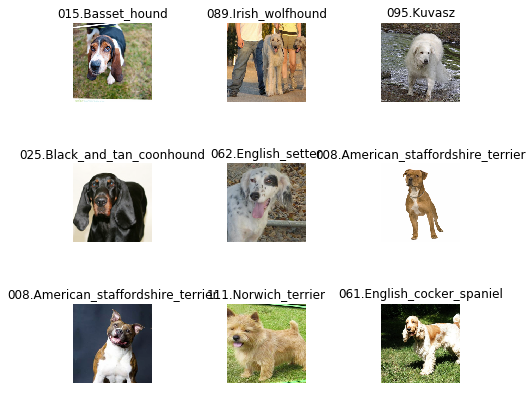

In [10]:
data.show_batch(rows=3, figsize=(7,6))